## 1.Load Libiary and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
tmp = pd.read_csv("tmp.csv",sep = ';')
tmp = tmp.iloc[:,1:]

FileNotFoundError: File b'tmp.csv' does not exist

In [ ]:
tmp.head()

In [21]:
# Add year
year = tmp.iloc[:,0].str[0:4]
tmp['year'] = year

In [22]:
def plot_codename(codename):
    #T = tmp[tmp['year'] == year]
    T = tmp[tmp['Adressanredecode'] == codename].groupby(['year'])['count'].count()
    plt.plot(T,label = "{}".format(codename))
    #plt.title("{} yearly count".format(codename))
    plt.legend()
    
# Select the year
def select_year(year):
    return tmp[tmp["year"] == year]

# select the codename
def select_code(codename):
    return tmp[tmp["Adressanredecode"] == codename]

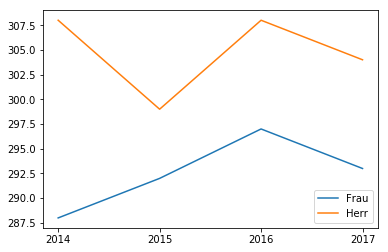

In [23]:
plot_codename('Frau')
plot_codename('Herr')

## 2.Convert the Auftragsdatum to datetime

In [4]:
tmp.iloc[:,0] = pd.to_datetime(tmp.iloc[:,0], format="%Y/%m/%d")

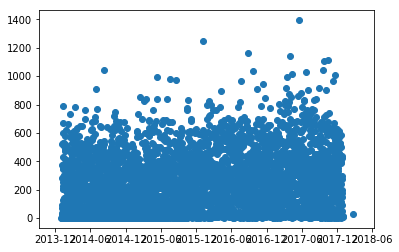

In [8]:
plt.scatter(tmp['Auftragsdatum'].values,tmp[['count']].values)

## 3. Prophet

In [24]:
import pandas as pd
from fbprophet import Prophet


In [43]:
def prophet_data(df):
    df = df[["Auftragsdatum","count"]]
    df.columns = ["ds","y"]
    return df

In [38]:
Frau = select_code("Frau")

In [44]:
df = prophet_data(Frau)

In [45]:
df.head()

,ds,y
2,2014-01-02,14
10,2014-01-04,283
13,2014-01-06,33
16,2014-01-07,206
19,2014-01-08,77


In [46]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/TobiasChen/miniconda3/envs/csh/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper
1530,2018-12-25,155.116690,41.865484,264.135454
1531,2018-12-26,145.536553,39.910693,255.058127
1532,2018-12-27,144.740976,32.829940,254.359314
1533,2018-12-28,142.274956,30.073901,258.479155
1534,2018-12-29,63.453863,-51.045688,176.540600


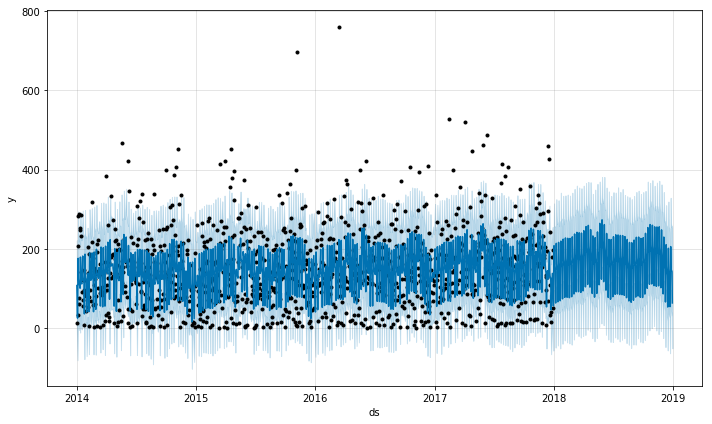

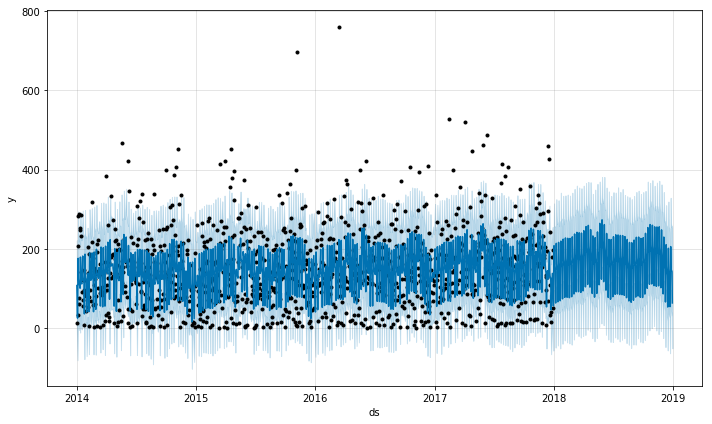

In [47]:
m.plot(forecast)

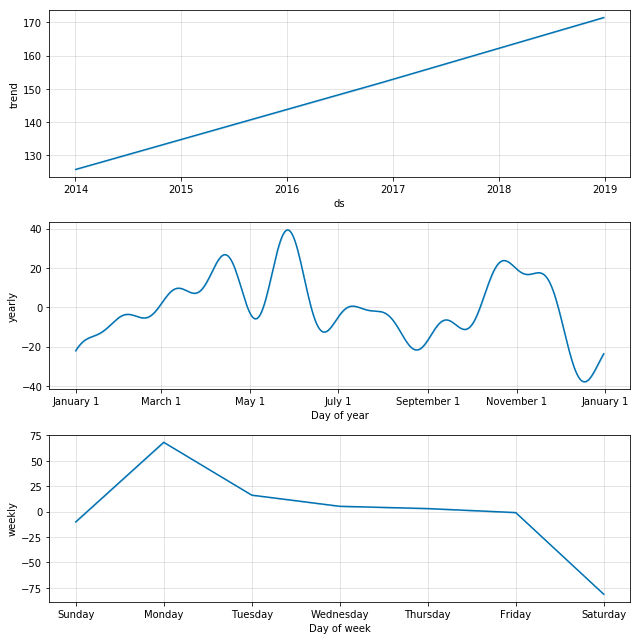

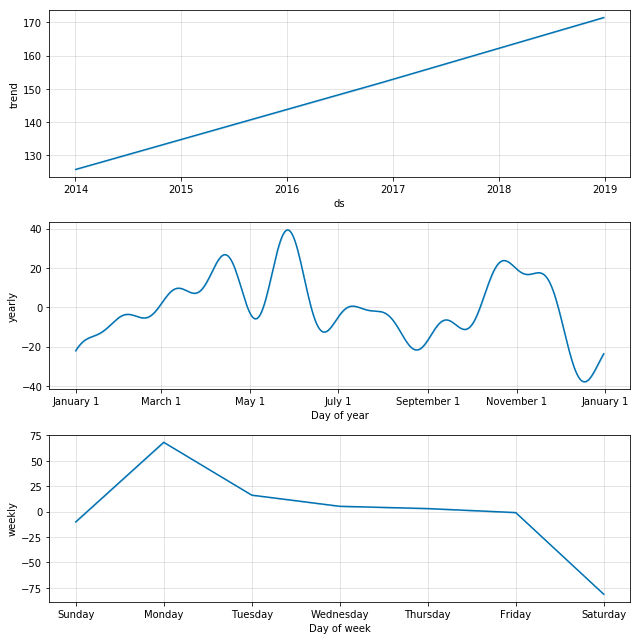

In [48]:
m.plot_components(forecast)


In [49]:
df.shape

(1170, 2)

### 3.1 Train_test_split

In [54]:
df_train = df.iloc[0:1000,]

In [55]:
df_test = df.iloc[1000:,]

In [56]:
df_train.shape

(1000, 2)

In [79]:
df_test.head()

,ds,y
3539,2017-06-10,84
3542,2017-06-11,488
3546,2017-06-12,197
3549,2017-06-13,78
3552,2017-06-14,148


In [58]:
m = Prophet()
m.fit(df_train)
future = m.make_future_dataframe(periods=170)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/TobiasChen/miniconda3/envs/csh/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper
1165,2017-11-22,169.978435,56.526143,285.992448
1166,2017-11-23,163.409088,48.840161,277.198486
1167,2017-11-24,170.700125,59.013801,282.180587
1168,2017-11-25,84.311803,-22.652362,190.338127
1169,2017-11-26,141.669257,26.460701,248.145948


In [68]:
forecast['yhat'][1000:].shape

(170,)

In [78]:
df_test['y'].shape

(170,)

In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error(forecast['yhat'][1000:],df_test['y'])

12075.354558492412

In [ ]:
{'col1': [1, 2], 'col2': [3, 4]}

In [103]:
real_pred = pd.DataFrame(data= {'y_pred':forecast['yhat'][1000:],'y_real':list(df_test.iloc[:,1])})

In [104]:
real_pred.tail()

,y_pred,y_real
1165,169.978435,41
1166,163.409088,15
1167,170.700125,180
1168,84.311803,196
1169,141.669257,51


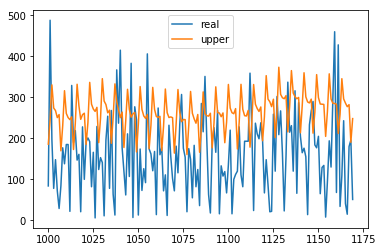

In [113]:
#plt.plot(real_pred.index,real_pred['y_pred'],label = "pred")
plt.plot(real_pred.index,real_pred['y_real'],label = "real")
plt.plot(real_pred.index,forecast['yhat_upper'][-170:],label = "upper")


plt.legend()

In [105]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [109]:
forecast['yhat_upper'][-170:].shape

(170,)

In [111]:
real_pred['y_real'].shape

(170,)